# Insurance Cost Forecast

Predicting the cost of medical insurance using linear regression. Data was gotten from Kaggle - https://www.kaggle.com/mirichoi0218/insurance

# Importing Libraries

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Inport and Preprocessing

In [27]:
insurance_data = pd.read_csv("insurance.csv")

In [28]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [29]:
insurance_data.shape

(1338, 7)

In [30]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [32]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [33]:
insurance_data["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [9]:
insurance_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [10]:
insurance_data["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [11]:
insurance_data.groupby(["sex"])["bmi", "charges"].mean()


<ipython-input-11-bca80fc5a2c2>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  insurance_data.groupby(["sex"])["bmi", "charges"].mean()


,bmi,charges
sex,,
female,30.377749,12569.578844
male,30.943129,13956.751178


In [12]:
insurance_data.groupby(["sex", "smoker"])["bmi", "charges"].mean()

<ipython-input-12-661baa482073>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  insurance_data.groupby(["sex", "smoker"])["bmi", "charges"].mean()


bmi       charges
sex    smoker                         
female no      30.539525   8762.297300
       yes     29.608261  30678.996276
male   no      30.770580   8087.204731
       yes     31.504182  33042.005975

# Data Analysis

In [34]:
corr = insurance_data.corr()

<AxesSubplot:>

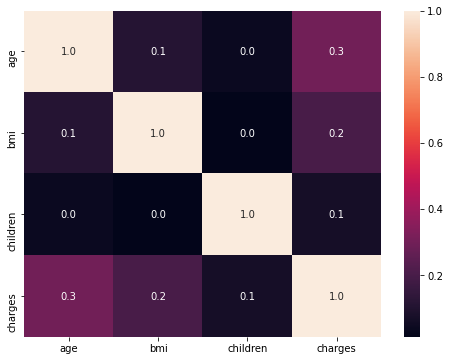

In [14]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, cbar=True, annot=True, fmt=".1f")

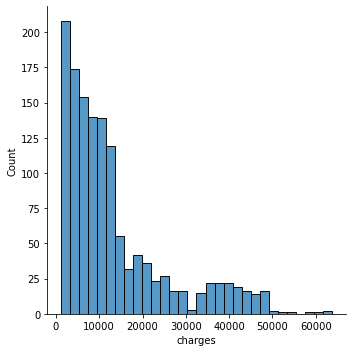

In [15]:
sns.displot(insurance_data["charges"])

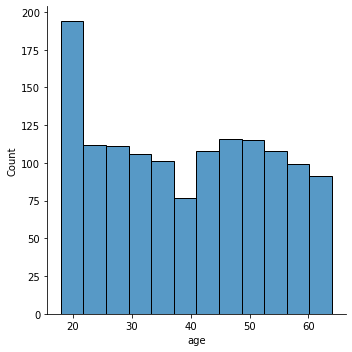

In [16]:
sns.displot(insurance_data["age"])

# Train Test Split

In [38]:
#label encoding
encoder = LabelEncoder()
insurance_data["sex"] = encoder.fit_transform(insurance_data["sex"])
#female - 0, male - 1

insurance_data["region"] = encoder.fit_transform(insurance_data["region"])
#northeast - 0, northwest - 1, southeast - 2, southwest - 3

insurance_data["smoker"] = encoder.fit_transform(insurance_data["smoker"])
#no - 0, yes - 1
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [39]:
X = insurance_data.drop(columns=["charges"])
Y = insurance_data["charges"]

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=45)

# Model Selection

In [41]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

LinearRegression()

In [42]:
train_accuracy = linear_model.score(X_train, Y_train)
train_accuracy

0.7603656534083785

# Model Evaluation on Test Data

In [43]:
y_test_predicted = linear_model.predict(X_test)

In [44]:
test_accuracy = linear_model.score(X_test, Y_test)
test_accuracy

0.7035989194448834

In [45]:
r2_score = r2_score(y_test_predicted, Y_test)
r2_score

0.62424098147785

# Test and Predicted Data Visualisation

Text(0.5, 1.0, 'Actual vs Predicted Data')

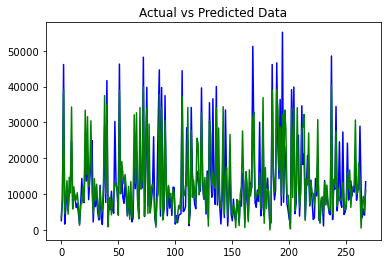

In [46]:
Y_test = list(Y_test)
plt.plot(Y_test, color="blue", label="Test Data")
plt.plot(y_test_predicted, color="green", label="Predicted Data")
plt.title("Actual vs Predicted Data")

# Building A Predicting System 

In [54]:
#Randomly feeding a csv line to the model to see if it predicts the charge correctly

#change categorical data to suit encoded 
input_data = (46,0,33.44,1,0,2)

In [55]:
#change input data into numpy array
np_input_data = np.asarray(input_data)

In [56]:
input_data_reshaped = np_input_data.reshape(1, -1)

In [60]:
predict = linear_model.predict(input_data_reshaped)
print(predict)

[10809.97700261]


In [63]:
print(predict[0])

10809.977002614989


In [62]:
#actual - 46,female,33.44,1,no,southeast,8240.5896